# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [12]:
import pandas as pd
df = pd.read_csv('Iowa_Liquor_Sales.csv')
## Load the data into a DataFrame
df.head()

/Users/polbrigneti/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [235]:
df.shape

(13257014, 24)

In [13]:
# Drop nul | bad values
df = df.dropna()

In [14]:
# Transform the dates if needed, e.g.
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y')

In [15]:
# Converting 'objects' to  integers
df['County Number'] = df['County Number'].astype('int64')
df['Category'] = df['Category'].astype('int64')
df['Vendor Number'] = df['Vendor Number'].astype('int64')

In [16]:
#funciton to remove $ sign
def normalize_values(text):
    rpl = text.replace('$','')
    return rpl

In [17]:
#Removing $ sign
df['State Bottle Cost'] = df['State Bottle Cost'].apply(normalize_values)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(normalize_values)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(normalize_values)

In [18]:
# Converting 'objects' to float
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')

In [19]:
# Delete  useless columns
df_iowa = df.drop(['Address','Zip Code','Store Location','County Number','County','Category','Vendor Name','Vendor Number','Category Name'], axis=1)

In [20]:
# Adding new columns: Margin and Revenue
df_iowa.insert(11,'Margin',(df['State Bottle Retail'] - df['State Bottle Cost']))
df_iowa['Revenue'] = df_iowa['Bottles Sold'] * df_iowa['Margin']

In [21]:
# Visualizing new dataframe
df_iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,City,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenue
6,S28865700001,2015-11-09,2538,Hy-Vee Food Store #3 / Waterloo,WATERLOO,238,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,5.81,6,104.58,9.0,2.38,34.86
8,S29339300091,2015-11-30,2662,Hy-Vee Wine & Spirits / Muscatine,MUSCATINE,173,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,9.79,4,117.48,3.0,0.79,39.16
13,S28866900001,2015-11-11,3650,"Spirits, Stogies and Stuff",HOLSTEIN,238,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,5.81,1,17.43,1.5,0.40,5.81
18,S29134300126,2015-11-18,3723,J D Spirits Liquor,ONAWA,258,"Rumchata ""GoChatas""",1,6000,99.00,148.50,49.50,1,148.50,6.0,1.59,49.50
21,S29282800048,2015-11-23,2642,Hy-Vee Wine and Spirits / Pella,PELLA,238,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,5.81,6,104.58,9.0,2.38,34.86


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

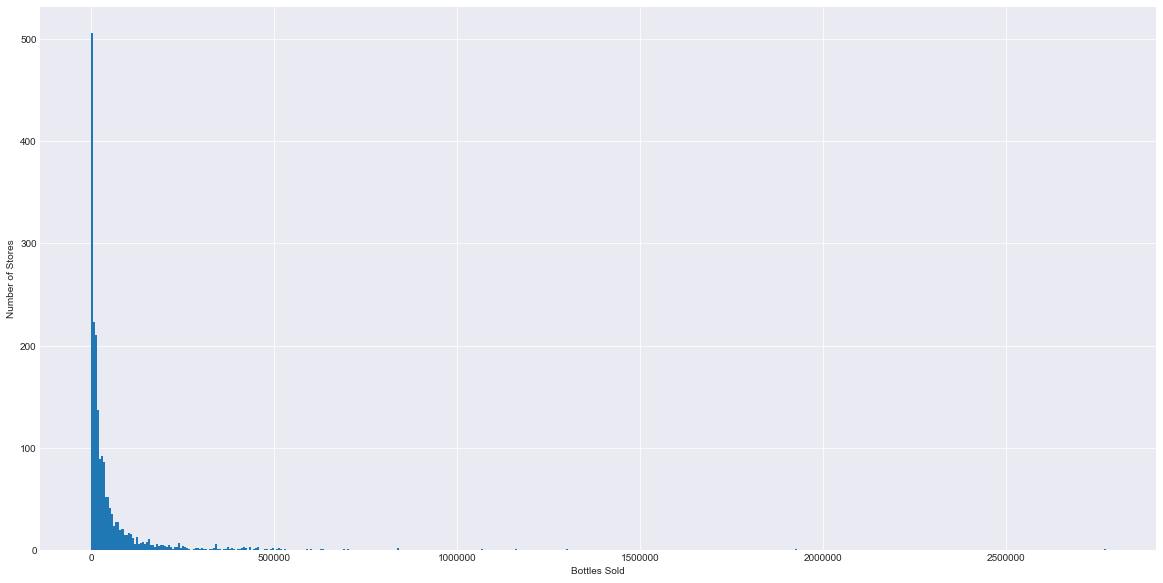

In [29]:
# Grouping by Sotre Number - Bottles Sold
bottles_sold_table = df_iowa.groupby(['Store Number'])['Bottles Sold'].sum()
plt.figure(figsize=(20, 10))
plt.hist(bottles_sold_table, bins=500)
plt.ylabel('Number of Stores')
plt.xlabel('Bottles Sold');
plt.show()

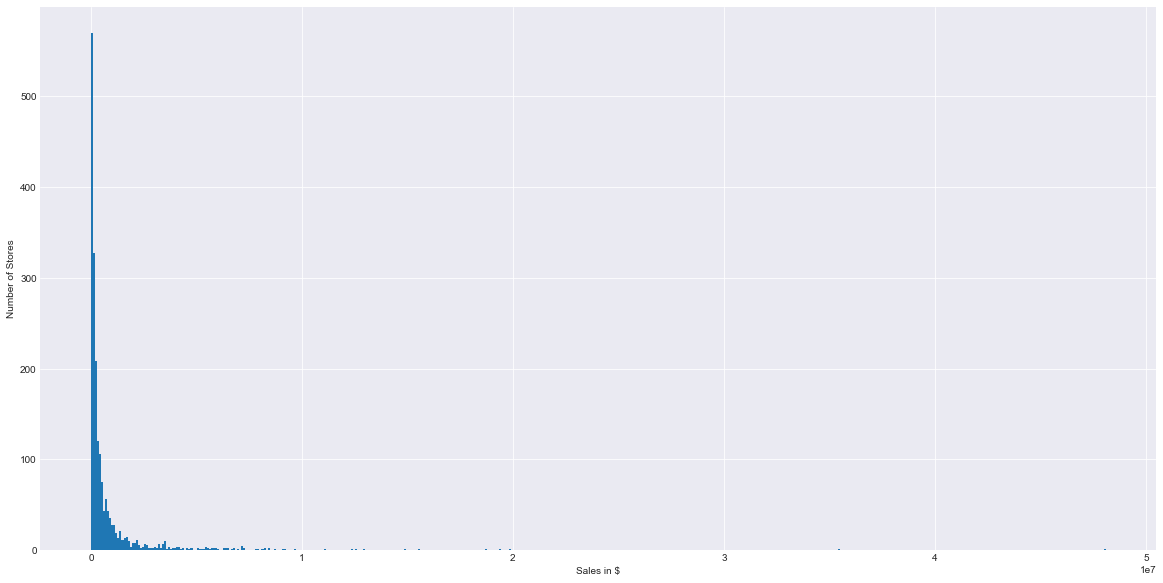

In [60]:
# Grouping by Sotre Number - Sales
sales_by_store = df_iowa.groupby(['Store Number'])['Sale (Dollars)'].sum()
plt.figure(figsize=(20,10))
plt.hist(revenue_by_store, bins=500)
plt.ylabel('Number of Stores')
plt.xlabel('Sales in $');
plt.show()

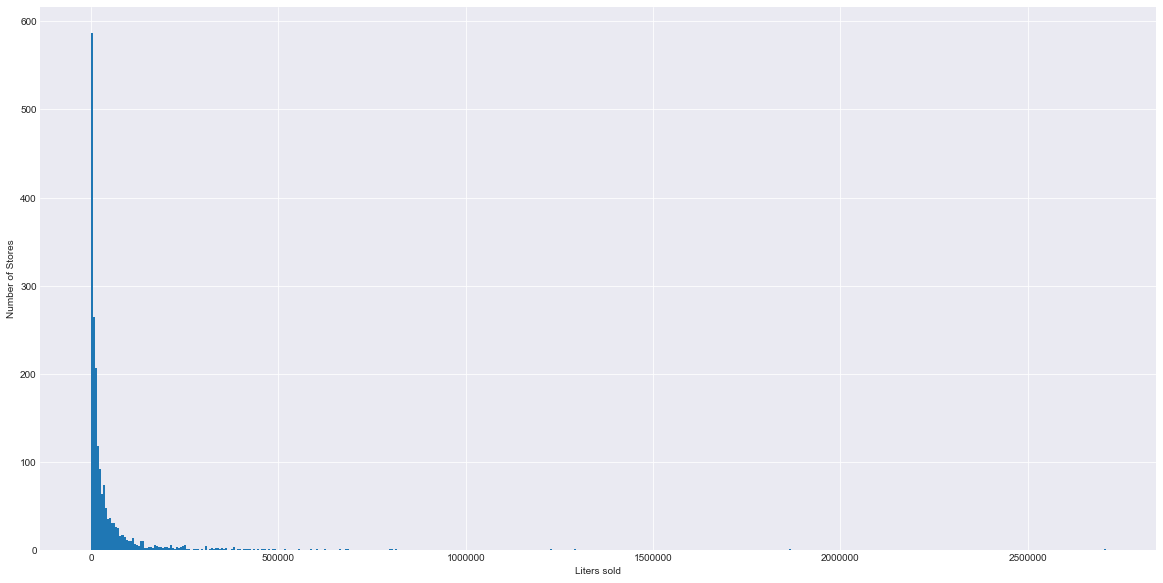

In [34]:
# Grouping by Sotre Number - Volum Sold(L)
volume_sold_L_table = df_iowa.groupby(['Store Number'])['Volume Sold (Liters)'].sum()
plt.figure(figsize=(20,10))
plt.hist(volume_sold_L_table, bins=500)
plt.ylabel('Number of Stores')
plt.xlabel('Liters sold');
plt.show()

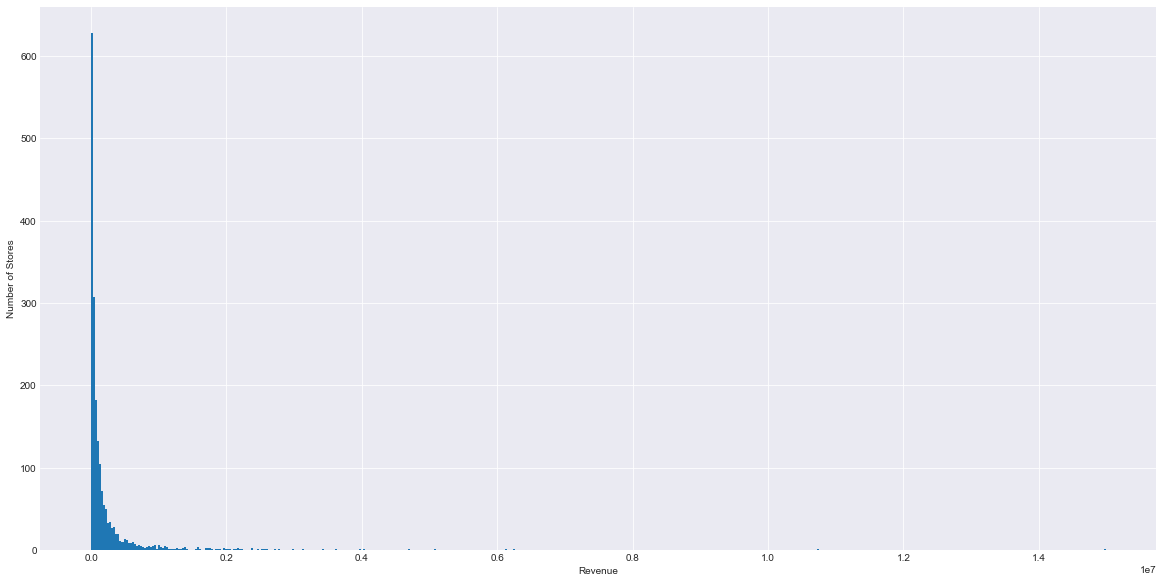

In [33]:
# Grouping by Sotre Number - Margin
revenue_table = df_iowa.groupby(['Store Number'])['Revenue'].sum()
plt.figure(figsize=(20,10))
plt.hist(volume_sold_L_table, bins=500)
plt.ylabel('Number of Stores')
plt.xlabel('Revenue');
plt.show()

In [62]:
# Calculating % of sales from the top sotres
top_10_stores= df_iowa.groupby(['Store Number'])['Sale (Dollars)','Margin'].sum().sort_values('Sale (Dollars)', ascending=False).head(10)
top_10_stores.sum()

Sale (Dollars)    2.098484e+08
Margin            3.582168e+06
dtype: float64

In [197]:
(top_10_stores.sum()/sales_by_store.sum())*100

Sale (Dollars)    13.837260
Margin             0.236206
dtype: float64

In [64]:
# Volume
df_iowa['Bottle Volume (ml)'].value_counts().head()

750     6015148
1750    2677467
1000    1869084
375     1297098
500      556711
Name: Bottle Volume (ml), dtype: int64

In [65]:
# Pack best seller
df_iowa['Pack'].value_counts().head()

12    7914917
6     3522233
24    1173052
48     311447
10     198324
Name: Pack, dtype: int64

In [93]:
# City with most sales
df_iowa.groupby(['City'])['Sale (Dollars)','Revenue'].sum().sort_values('Sale (Dollars)', ascending = False).head()

,Sale (Dollars),Revenue
City,,
DES MOINES,1.429987e+08,4.778723e+07
CEDAR RAPIDS,8.047360e+07,2.694235e+07
DAVENPORT,5.788401e+07,1.936509e+07
WEST DES MOINES,4.328201e+07,1.449593e+07
WATERLOO,4.284412e+07,1.433411e+07


In [67]:
#Best selling liquor
df_iowa.groupby(['Item Number','Item Description'])['Bottles Sold','Sale (Dollars)', 'Margin'].sum().sort_values('Bottles Sold', ascending = False).head()

,,Bottles Sold,Sale (Dollars),Margin
Item Number,Item Description,,,
11788,Black Velvet,2553656,3.936153e+07,705542.409998
36308,Hawkeye Vodka,1618933,1.858588e+07,460644.650001
43337,Captain Morgan Spiced Rum,1617049,3.012642e+07,364838.410000
36904,Mccormick Vodka Pet,1242593,4.252984e+06,55364.960000
35317,Barton Vodka,948788,5.834346e+06,50667.530000


In [199]:
# Liquor with the highest margin
df_iowa[['Item Description','Margin', 'State Bottle Cost','State Bottle Retail' ]].sort_values('Margin', ascending = False).head()

,Item Description,Margin,State Bottle Cost,State Bottle Retail
10243461,Cedar Ridge Reserve Bourbon Private Cask,3840.0,7680.0,11520.0
9114990,Cedar Ridge Rye Whiskey - Whole Cask Buy,3234.0,6468.0,9702.0
8885136,Cedar Ridge Rye Whiskey - Whole Cask Buy,3234.0,6468.0,9702.0
8428008,Cedar Ridge Malted Rye Barrel Marion,3050.0,6100.0,9150.0
8428007,Cedar Ridge Malted Rye Barrel Urbandale,3050.0,6100.0,9150.0


In [141]:
# Store with the highest revenue
df_iowa.groupby(['Store Number', 'Store Name','City'])['Sale (Dollars)', 'Bottles Sold'].sum().sort_values('Sale (Dollars)', ascending = False).head()

,,,Sale (Dollars),Bottles Sold
Store Number,Store Name,City,,
2633,Hy-Vee #3 / BDI / Des Moines,DES MOINES,3.997697e+07,2476252
4829,Central City 2,DES MOINES,2.765022e+07,1662847
3420,Sam's Club 6344 / Windsor Heights,WINDSOR HEIGHTS,1.718272e+07,1002959
3385,Sam's Club 8162 / Cedar Rapids,CEDAR RAPIDS,1.689539e+07,1054021
2512,Hy-Vee Wine and Spirits / Iowa City,IOWA CITY,1.627655e+07,1141213


In [23]:
import datetime as dt

In [24]:
#Adding month, year columns at a specific index
df_iowa.insert(2, 'Month', df_iowa['Date'].dt.month)
df_iowa.insert(3, 'Year', df_iowa['Date'].dt.year)

In [25]:
def quarter(series):
    if series == 1 or series == 2 or series == 3:
        return 'Q1'
    elif series == 4 or series ==  5 or series == 6:
        return 'Q2'
    elif series == 7 or series ==  8 or series == 9:
        return 'Q3'
    else:
        return 'Q4'

In [26]:
# Adding quarter column
df_iowa.insert(4,'Quarter',df_iowa['Month'].apply(quarter))

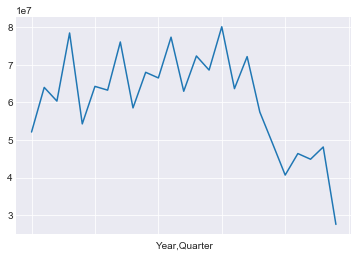

In [86]:
quarter_sales = df_iowa.groupby(['Year','Quarter'])['Sale (Dollars)'].sum()
quarter_sales.plot(kind='line')

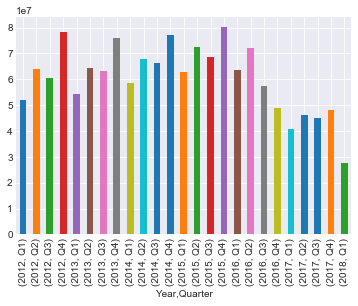

In [91]:
quarter_bottles_sold = df_iowa.groupby(['Year','Quarter'])['Bottles Sold'].sum()
quarter_sales.plot(kind='bar')

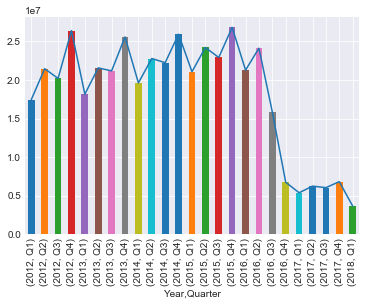

In [88]:
quarter_revenue = df_iowa.groupby(['Year','Quarter'])['Revenue'].sum()
quarter_revenue.plot(kind='line')
quarter_revenue.plot(kind='bar')

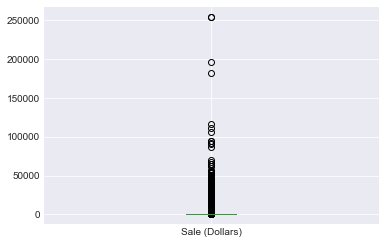

In [230]:
df_iowa['Sale (Dollars)'].plot(kind='box')

The amount of bottles sold and therefore the sales has decreased notably from Q4 - 2016 onwards

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

1. We can see most of the bottles sold are 750 ml followed by 1750 ml
2. Most of the bottles are sold in packs of 12
3. Des Moines (Capital of Iowa) is the city with more stores, 809.000 and sales 142.998.700$.
4. Black Velevet is the best selling liquor - 2.553.656 bottles | 39.361.50 Dollars
5. Cedar Ridge Reserve Bourbon Private Cask is the liquor with the highest margin 3.840 Dollars
6. The stores with the highest Revenue is a Wal Mart with 1.477.263.000 Dollars -- Weird
7. 10 stores concentrate the 14% of sales in the last 5 years.
8. There is a clear seasonality on the liquor market, a big amount of the sales are concentrated in Q4 - Christmas time.

*This is data from 2012 until 2018*



# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [101]:
#total sales per store from Jan to March of 2015
q1_2015_sales = df_iowa[(df_iowa['Year'] == 2015) & (df_iowa['Quarter'] == 'Q1')]
q1_2015_sales.groupby(['Year','Quarter'])['Sale (Dollars)'].sum()

Year  Quarter
2015  Q1         6.293467e+07
Name: Sale (Dollars), dtype: float64

In [202]:
#Grouping by year
df_iowa.groupby(['Year'])['Bottles Sold','Sale (Dollars)','Volume Sold (Liters)'].sum()

,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
Year,,,
2012,19890824,-inf,1.872778e+07
2013,19911077,2.577205e+08,1.855222e+07
2014,20649238,2.702327e+08,1.914051e+07
2015,21552771,2.838789e+08,1.959807e+07
2016,15453150,2.422750e+08,1.395257e+07
2017,5121459,1.799906e+08,4.458310e+06
2018,777300,2.752645e+07,6.628261e+05


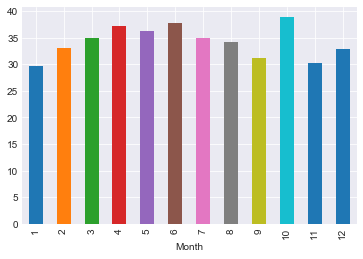

In [104]:
monthly_slaes = df_iowa.groupby(['Month'])['Revenue'].mean()
monthly_slaes.plot(kind='bar')

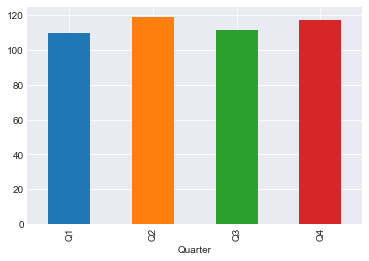

In [108]:
monthly_slaes = df_iowa.groupby(['Quarter'])['Sale (Dollars)'].mean()
monthly_slaes.plot(kind='bar')

In [106]:
df_iowa[df_iowa['Item Description']=='Black Velvet'][['Year','Quarter','Item Description','State Bottle Cost','State Bottle Retail']].sort_values('Quarter')

,Year,Quarter,Item Description,State Bottle Cost,State Bottle Retail
13355196,2018,Q1,Black Velvet,10.45,15.68
3186666,2015,Q1,Black Velvet,10.45,15.68
8445612,2016,Q1,Black Velvet,10.45,15.68
8445613,2016,Q1,Black Velvet,10.45,15.68
3186639,2014,Q1,Black Velvet,10.45,15.67
3186575,2015,Q1,Black Velvet,5.23,7.85
8445614,2016,Q1,Black Velvet,10.45,15.68
8445615,2016,Q1,Black Velvet,10.45,15.68
8445616,2016,Q1,Black Velvet,10.45,15.68
8445617,2016,Q1,Black Velvet,10.45,15.68


In [115]:
#Grouping by store
df_iowa_by_store = df_iowa.groupby(['Store Number']).sum()
df_iowa_by_store

,Month,Year,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenue
Store Number,,,,,,,,,,,,,
2106,182686,57178859,1614064509,325335,25765203,295532.70,443665.97,148133.27,420452,6.783131e+06,389947.87,102987.73,1.963553e+06
2113,53629,16673143,366778356,97508,7999525,84633.83,127096.55,42462.72,34740,4.674542e+05,34179.14,9014.49,1.519014e+05
2130,147711,46723273,1182768333,289932,21479925,235145.60,352965.62,117820.02,342644,5.939658e+06,305345.49,80638.52,1.715156e+06
2132,1327,1076420,26164265,5588,590875,5361.74,8062.90,2701.16,4131,5.718595e+04,4459.80,1178.16,1.915548e+04
2152,42235,13208826,262220377,73908,6896700,55347.20,83245.14,27897.94,30917,3.825937e+05,32740.09,8648.41,1.281277e+05
2161,2111,1138792,25817600,6156,622250,4865.64,7311.81,2446.17,3232,4.236305e+04,3593.92,948.50,1.417316e+04
2178,108246,32223916,754820263,186986,16326800,158462.41,238310.23,79847.82,100371,1.571652e+06,105840.77,27941.99,4.519569e+05
2190,575811,180446318,6060986673,1101307,77000581,1083658.09,1627570.64,543912.55,839666,1.289562e+07,678303.29,179132.10,4.033226e+06
2191,214162,66986571,1714282187,384488,32192875,363602.09,545881.68,182279.59,330901,5.605002e+06,335486.45,88585.44,1.687445e+06


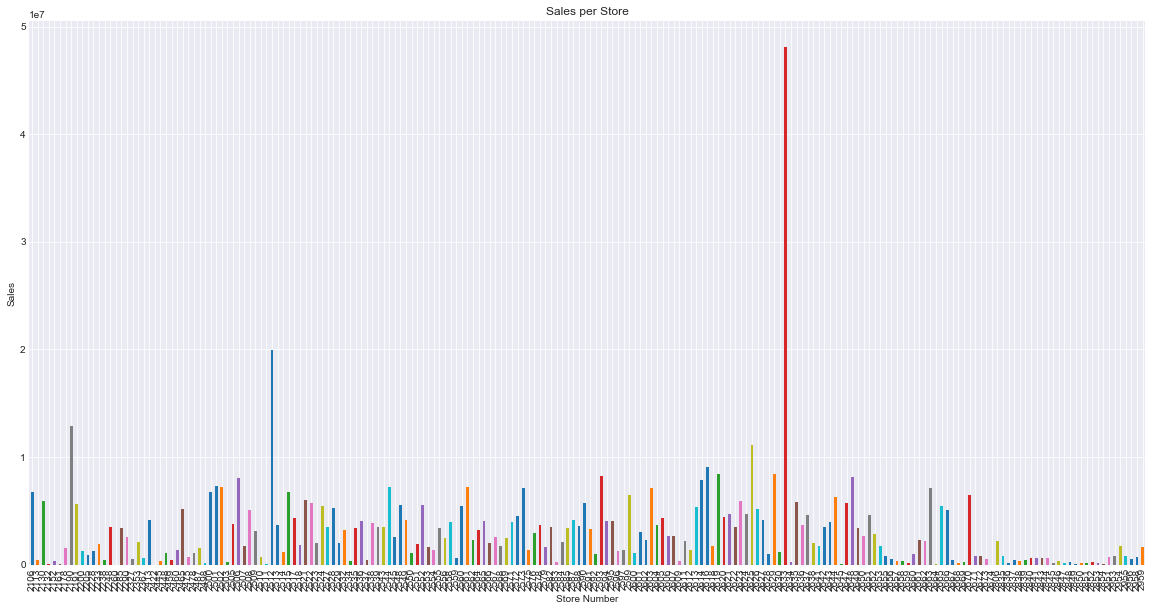

In [117]:
plt.figure(figsize=(20,10))
df_iowa_by_store['Sale (Dollars)'].head(200).plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales per Store');

In [204]:
#Mean price per bottle
df_iowa.groupby(['Item Number','Item Description'])['State Bottle Retail'].mean()

Item Number  Item Description                                           
101          Stolichnaya Premium 80prf w/2 Stemless Martini Glasses          29.9700
102          Bushmills 750ml w/Blackbush 50ml                                19.5000
104          Broker's Gin Holiday w/1 Collins Glass                          17.0100
107          Bushmills Black w/Rubber Ice Ball Molds                         31.3400
108          Midnight Moon Cran-Apple Pie                                    17.2500
114          Belvedere Pure Red w/Shaker                                     25.7300
115          Crown Royal w/Glass & Coaster                                   22.6100
122          Deep Eddy Vodka w/2 Tin Cups                                    13.5000
124          Deep Eddy 750ml Vodka w/3-50mls                                 13.5000
127          Deep Eddy Lemon w/2 Tin Cups                                    13.5000
129          Deep Eddy Ruby Red w/2 Tin Cups                                 

## Comparing top 3 stores

In [140]:
store_2633 = df_iowa[df_iowa['Store Number'] == 2633]
store_2633.groupby(['Item Number','Item Description'])['Bottles Sold','Sale (Dollars)','Margin','Volume Sold (Liters)'].sum().sort_values('Bottles Sold', ascending=False).head()

,,Bottles Sold,Sale (Dollars),Margin,Volume Sold (Liters)
Item Number,Item Description,,,,
89387,Juarez Tequila Gold,160305,1598220.00,1146.33,160305.0
37347,Phillips Vodka,158879,986673.60,626.64,158879.0
43337,Captain Morgan Spiced Rum,143662,2453348.88,1402.11,143662.0
35317,Barton Vodka,111402,647590.20,434.87,111402.0
64867,Fireball Cinnamon Whiskey,84972,1417918.88,1099.53,84972.0


In [138]:
store_4829 = df_iowa[df_iowa['Store Number'] == 4829]
store_4829.groupby(['Item Number','Item Description'])['Bottles Sold','Sale (Dollars)','Margin','Volume Sold (Liters)'].sum().sort_values('Bottles Sold', ascending=False).head()

,,Bottles Sold,Sale (Dollars),Margin,Volume Sold (Liters)
Item Number,Item Description,,,,
35317,Barton Vodka,105910,622829.76,1341.27,105910.0
43337,Captain Morgan Spiced Rum,95206,1649942.36,3640.06,95206.0
37347,Phillips Vodka,81203,516539.76,1325.25,81203.0
11297,Crown Royal Canadian Whisky,58405,1628151.75,6782.06,58405.0
26827,Jack Daniels Old #7 Black Lbl,56075,1490030.25,4404.19,56075.0


In [142]:
store_3420 = df_iowa[df_iowa['Store Number'] == 3420]
store_3420.groupby(['Item Number','Item Description'])['Bottles Sold','Sale (Dollars)','Margin','Volume Sold (Liters)'].sum().sort_values('Bottles Sold', ascending=False).head()

,,Bottles Sold,Sale (Dollars),Margin,Volume Sold (Liters)
Item Number,Item Description,,,,
35317,Barton Vodka,33749,198976.20,325.27,33749.00
11788,Black Velvet,33148,481813.56,658.34,58009.00
89387,Juarez Tequila Gold,30987,315011.52,787.81,30987.00
36308,Hawkeye Vodka,27539,292454.04,756.57,48193.25
64867,Fireball Cinnamon Whiskey,27457,462721.16,726.84,27457.00


### Findings

Barton Vodka, Phillips Vodka and Juarez Tequila Gold are within the top sales for the 3 stores.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [149]:
import numpy as np

In [27]:
df_iowa_corr = df_iowa.drop(['Volume Sold (Gallons)','Pack','Bottle Volume (ml)','Year','Month','Quarter','Invoice/Item Number','Date','Store Number','Store Name','City','Item Number','Item Description'], axis=1)

In [165]:
df_iowa_corr

,State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue
6,11.62,17.43,5.81,6,2.019449,9.00,34.86
8,19.58,29.37,9.79,4,2.069964,3.00,39.16
13,11.62,17.43,5.81,1,1.241297,1.50,5.81
18,99.00,148.50,49.50,1,2.171726,6.00,49.50
21,11.62,17.43,5.81,6,2.019449,9.00,34.86
25,11.62,17.43,5.81,3,1.718419,4.50,17.43
29,11.62,17.43,5.81,6,2.019449,9.00,34.86
38,11.62,17.43,5.81,2,1.542327,3.00,11.62
42,19.58,29.37,9.79,36,3.024206,27.00,352.44
50,11.62,17.43,5.81,12,2.320479,18.00,69.72


In [236]:
df_iowa_corr.corr()

,State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue
State Bottle Cost,1.000000,0.999965,0.999689,-0.030743,0.103898,0.015679,0.098446
State Bottle Retail,0.999965,1.000000,0.999862,-0.030632,0.104010,0.015954,0.098627
Margin,0.999689,0.999862,1.000000,-0.030403,0.104212,0.016500,0.098969
Bottles Sold,-0.030743,-0.030632,-0.030403,1.000000,0.847652,0.910852,0.863271
Sale (Dollars),0.103898,0.104010,0.104212,0.847652,1.000000,0.834248,0.987531
Volume Sold (Liters),0.015679,0.015954,0.016500,0.910852,0.834248,1.000000,0.851350
Revenue,0.098446,0.098627,0.098969,0.863271,0.987531,0.851350,1.000000


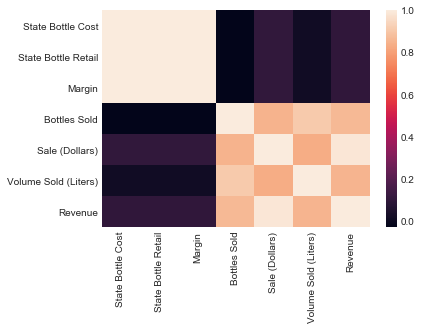

In [238]:
sns.heatmap(df_iowa_corr.corr())

In [241]:
df_iowa_corr.head()

,State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue
6,11.62,17.43,5.81,6,2.019449,9.0,34.86
8,19.58,29.37,9.79,4,2.069964,3.0,39.16
13,11.62,17.43,5.81,1,1.241297,1.5,5.81
18,99.00,148.50,49.50,1,2.171726,6.0,49.50
21,11.62,17.43,5.81,6,2.019449,9.0,34.86


ValueError: range parameter must be finite.

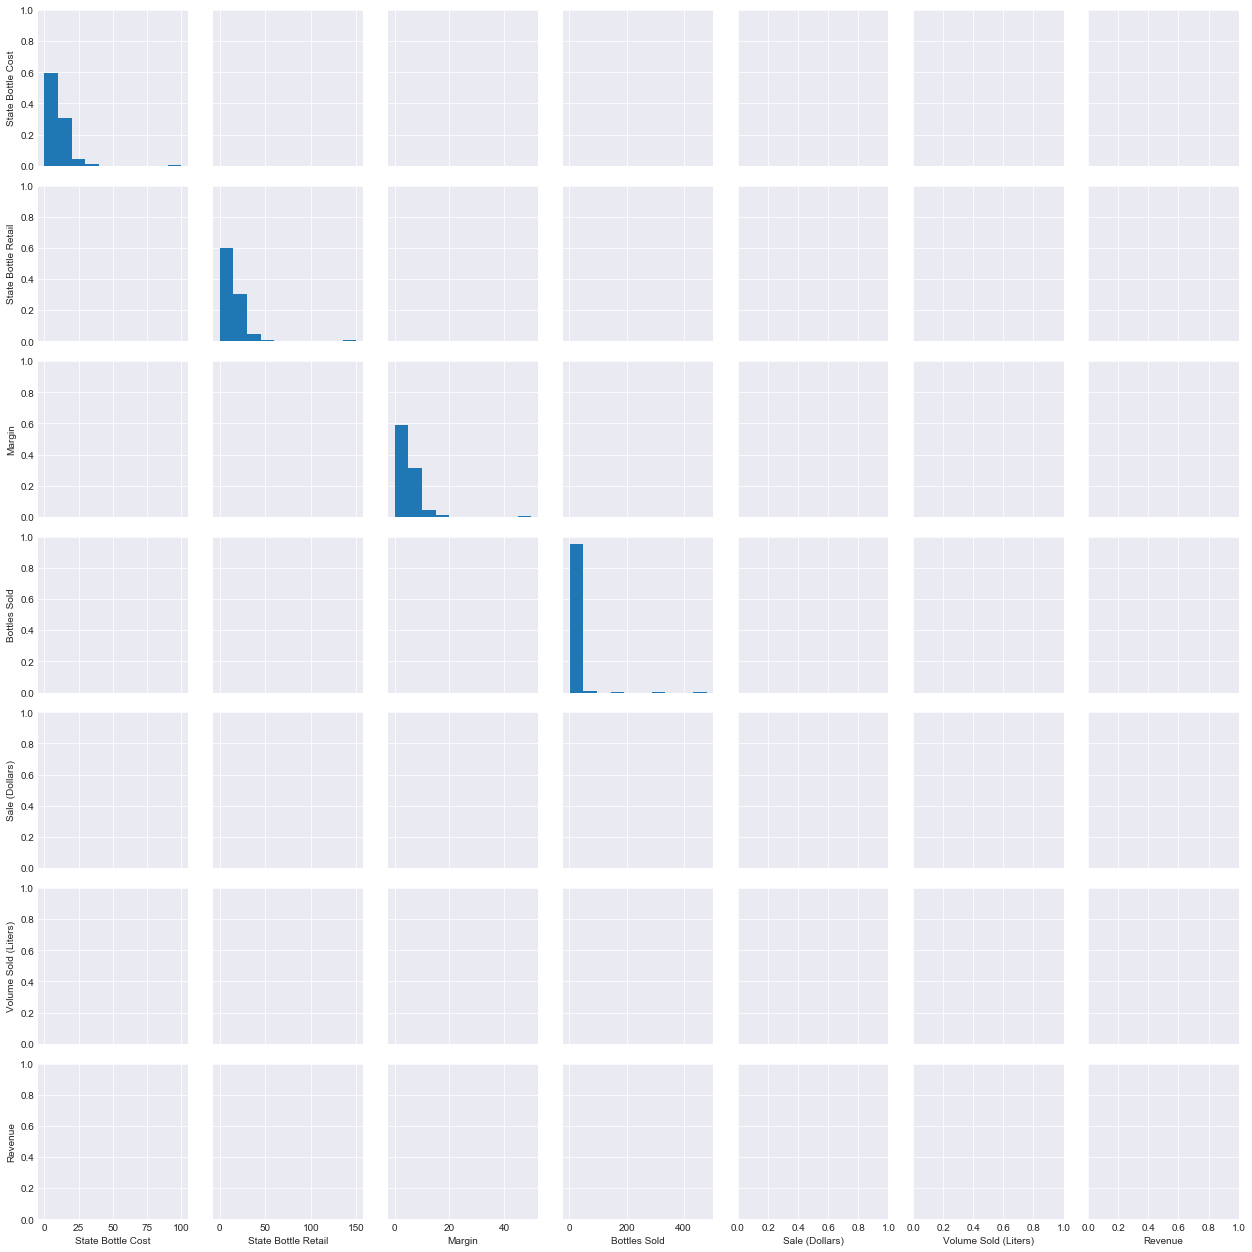

In [245]:
sns.pairplot(df_iowa_corr.head(1000).dropna());

                     Bottles Sold  Sale (Dollars)  State Bottle Retail
Bottles Sold             1.000000        0.847652            -0.030632
Sale (Dollars)           0.847652        1.000000             0.104010
State Bottle Retail     -0.030632        0.104010             1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


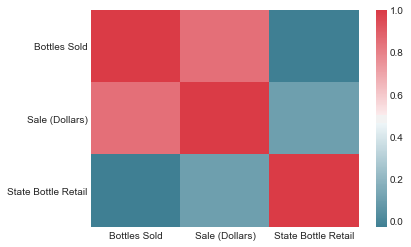

In [234]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_iowa[['Bottles Sold', 'Sale (Dollars)', 'State Bottle Retail']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

## Findings

- Negative Correlation between State Bottle Retail and Bottles Sold- 
- Positive Correlation between Sales and Bottles Sold

In [171]:
df_iowa_corr_np = df_iowa_corr.apply(np.log10)
df_iowa_corr_np

,State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue
6,1.065206,1.241297,0.764176,0.778151,0.305233,0.954243,1.542327
8,1.291813,1.467904,0.990783,0.602060,0.315963,0.477121,1.592843
13,1.065206,1.241297,0.764176,0.000000,0.093876,0.176091,0.764176
18,1.995635,2.171726,1.694605,0.000000,0.336805,0.778151,1.694605
21,1.065206,1.241297,0.764176,0.778151,0.305233,0.954243,1.542327
25,1.065206,1.241297,0.764176,0.477121,0.235129,0.653213,1.241297
29,1.065206,1.241297,0.764176,0.778151,0.305233,0.954243,1.542327
38,1.065206,1.241297,0.764176,0.301030,0.188177,0.477121,1.065206
42,1.291813,1.467904,0.990783,1.556303,0.480611,1.431364,2.547085
50,1.065206,1.241297,0.764176,1.079181,0.365578,1.255273,1.843357


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [29]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

In [377]:
#1 Creating a model
lm = linear_model.LinearRegression()

In [378]:
df_iowa.columns

Index([u'Invoice/Item Number', u'Date', u'Month', u'Year', u'Quarter',
       u'Store Number', u'Store Name', u'City', u'Item Number',
       u'Item Description', u'Pack', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Margin',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)', u'Revenue'],
      dtype='object')

In [386]:
df_1000 = df_iowa.replace([np.inf, -np.inf], 0)

In [388]:
#2 Fit the data inside the moedel
lm.fit(X=df_1000[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']],y=df_1000['Sale (Dollars)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [389]:
#3 Predict x
prediction = lm.predict(df_1000[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']])
prediction

array([116.71198483, 132.74803791,  32.03770762, ...,  33.05171666,
        75.91707467,  37.9513271 ])

In [390]:

metrics.mean_squared_error(df_1000['Sale (Dollars)'].replace([np.inf, -np.inf], 0), prediction)

3440.2731868313035

In [391]:
lm.score(X=df_1000[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']],y=df_1000['Sale (Dollars)'])

0.9754574375490752

In [348]:
list_elements = df_iowa_corr.columns
list_elements = list_elements.drop('Sale (Dollars)')
list_elements

Index([u'State Bottle Cost', u'State Bottle Retail', u'Margin',
       u'Bottles Sold', u'Volume Sold (Liters)', u'Revenue'],
      dtype='object')

In [392]:
for element in list_elements:
    lm = linear_model.LinearRegression()
    lm.fit(X=df_1000[[element]],y=df_1000['Sale (Dollars)'])
    print lm.score(X=df_1000[[element]],y=df_1000['Sale (Dollars)'])
    prediction = lm.predict(df_1000[[element]])
    print metrics.mean_squared_error(df_1000['Sale (Dollars)'].replace([np.inf, -np.inf], 0), prediction)

0.010794780464697395
138662.62741903085
0.010818032592073368
138659.36803360572
0.01086011377711571
138653.4692700654
0.7185142630700722
39457.48677106832
0.6959700116253367
42617.64512525776
0.9752168486426323
3473.997927902653


In [394]:
lm.params

Intercept    1.322762e+01
X[0]        -1.846021e+09
X[1]        -1.846021e+09
X[2]         1.846021e+09
X[3]        -5.673658e-02
X[4]        -2.843712e-01
X[5]         2.997965e+00
dtype: float64

In [393]:
import statsmodels.formula.api as smf

X = df_1000[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']]
y = df_1000[['Sale (Dollars)']]

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the following syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=df_1000).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 8.782e+07
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:51:21   Log-Likelihood:            -7.2789e+07
No. Observations:            13257014   AIC:                         1.456e+08
Df Residuals:                13257007   BIC:                         1.456e+08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2276      0.028    478.633      0.000      13.173      13.282
X[0]       -1.846e+09   8.94e+08     -2.065      0.039    -3.6e+09   -9.41e+07
X[1]       -1.846e+09   8.94e+08     -2.065      0.039    -3.6e+09   -9.41e+07
X[2]        1.846e+09   8.94e+08      2.065      0.039    9.41e+07     3.6e+09
X[3]          -0.0567      0.002    -28.160      0.000      -0.061      -0.053
X[4]          -0.2844      0.002   -180.511      0.000      -0.287      -0.281
X[5]           2.9980      0.000   1.09e+04      0.000       2.997       2.999
==============================================================================
Omnibus:                 17826748.300   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    3235793082927.320
Skew:                          -5.775   Prob(JB):                         0.00
Kurtosis:                    2423.294   Cond. No.                     1.29e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [395]:
# Deleting columns that doesn't add information
X = df_1000[['Bottles Sold','Volume Sold (Liters)','Revenue']]
y = df_1000[['Sale (Dollars)']]

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the following syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=df_1000).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.750e+08
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:55:09   Log-Likelihood:            -7.2812e+07
No. Observations:            13257014   AIC:                         1.456e+08
Df Residuals:                13257010   BIC:                         1.456e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3847      0.017    831.777      0.000      14.351      14.419
X[0]          -0.0862      0.002    -43.593      0.000      -0.090      -0.082
X[1]          -0.2922      0.002   -185.460      0.000      -0.295      -0.289
X[2]           3.0047      0.000   1.12e+04      0.000       3.004       3.005
==============================================================================
Omnibus:                 17658800.585   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    3203116306325.021
Skew:                          -5.652   Prob(JB):                         0.00
Kurtosis:                    2411.044   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Train test split

In [11]:
df_iowa.sample(200)

NameError: name 'df_iowa' is not defined

In [30]:
iowa = df_iowa_corr.replace([np.inf, -np.inf], 0)

In [438]:
iowa.head()

,State Bottle Cost,State Bottle Retail,Margin,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue
6,11.62,17.43,5.81,6,2.019449,9.0,34.86
8,19.58,29.37,9.79,4,2.069964,3.0,39.16
13,11.62,17.43,5.81,1,1.241297,1.5,5.81
18,99.00,148.50,49.50,1,2.171726,6.0,49.50
21,11.62,17.43,5.81,6,2.019449,9.0,34.86


In [439]:
iowa = iowa.drop(['Sale (Dollars)'], axis=1)

In [406]:
from sklearn import model_selection

In [444]:
y_train, y_test, x_train, x_test = model_selection.train_test_split(df_iowa_corr['Sale (Dollars)'].replace([np.inf, -np.inf], 0),iowa, test_size=0.2)

In [445]:
ll = linear_model.LinearRegression()

In [446]:
ll.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [447]:
ll.score(X=x_train, y=y_train)

0.9749669247495705

In [10]:
iowa

NameError: name 'iowa' is not defined

In [426]:
lm = linear_model.LinearRegression()

In [427]:
#2 Fit the data inside the moedel
lm.fit(X=iowa[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']],y=iowa['Sale (Dollars)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [428]:
#3 Predict x
prediction = lm.predict(iowa[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']])
prediction

array([116.71198483, 132.74803791,  32.03770762, ...,  33.05171666,
        75.91707467,  37.9513271 ])

In [430]:
metrics.mean_squared_error(iowa['Sale (Dollars)'], prediction)

3440.2731868313035

In [431]:
lm.score(X=iowa[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']],y=iowa['Sale (Dollars)'])

0.9754574375490752

In [2]:
from sklearn import cross_validation

/Users/polbrigneti/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
from sklearn.model_selection import cross_validate

In [36]:
X = iowa[['State Bottle Cost','Margin','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Revenue']]
y = iowa[['Sale (Dollars)']]

In [45]:
lm = linear_model.LinearRegression()

In [47]:
cross_validate(lm, X,y=y, cv=10, verbose=True)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   54.1s finished
/Users/polbrigneti/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([8.73192692, 5.3342011 , 4.22431087, 3.40900397, 3.41368985,
        3.71685195, 3.444947  , 3.44372702, 3.44533205, 4.09789896]),
 'score_time': array([0.20576096, 0.12867093, 0.06924701, 0.06706595, 0.06820607,
        0.06961513, 0.063972  , 0.06480908, 0.07095599, 0.07722712]),
 'test_score': array([ 0.99860277,  0.99809878,  0.99829991,  0.99868919,  0.99855211,
         0.99843233,  0.99852281,  0.85451397, -0.73467697, -0.80035456]),
 'train_score': array([0.97157992, 0.97265481, 0.97273648, 0.9709743 , 0.97159726,
        0.97238706, 0.97232335, 0.98084047, 0.98413242, 0.98436283])}

In [ ]:
cross_validate